In [18]:
from sklearn.linear_model import LinearRegression
import pandas as pd

from sklearn.model_selection import train_test_split

In [19]:
#!pip install tensorflow

In [20]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

from tensorflow.keras.utils import to_categorical


def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("./Kursmaterialien/data/fashion/train-images-idx3-ubyte.gz")

y_train = open_labels("./Kursmaterialien/data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("./Kursmaterialien/data/fashion/t10k-images-idx3-ubyte.gz")

y_test = open_labels("./Kursmaterialien/data/fashion/t10k-labels-idx1-ubyte.gz")

#One hot encoding
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()
model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer="sgd",loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
X_train.reshape(60000,784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
model.fit(X_train.reshape(60000,784),
         y_train,
          epochs=10,
          batch_size=1000
         )

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3791 - loss: 1.9297
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6704 - loss: 1.2595
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7121 - loss: 1.0575
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7378 - loss: 0.9417
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7494 - loss: 0.8713
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7643 - loss: 0.8168
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7717 - loss: 0.7698
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7817 - loss: 0.7343
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7838 - loss: 0.7122
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7903 - loss: 0.6879


## Evaluieren bzw testen des Models

In [27]:
model.evaluate(X_test.reshape(10000,784),  y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7877 - loss: 0.6887


[0.6930200457572937, 0.78329998254776]

In [12]:
#model.evaluate?

In [13]:
#print(model.metrics_names)

['loss', 'compile_metrics']


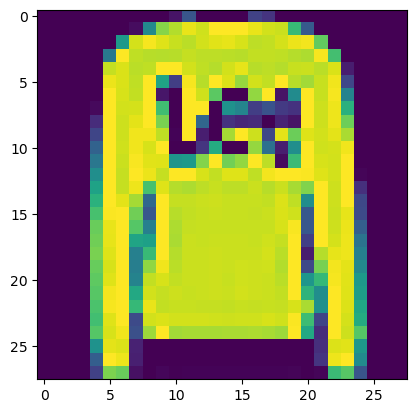

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

test_d = X_test[1]

plt.imshow(test_d)
plt.show()

In [37]:
pred = model.predict(X_test.reshape(-1, 784))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [38]:
pred.shape

(10000, 10)

In [40]:
import numpy as np

np.argmax(pred[1])

2